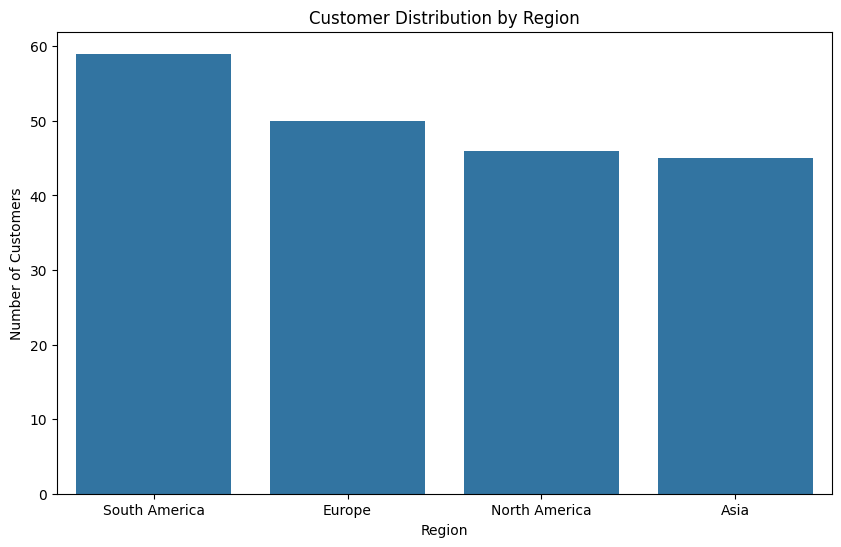

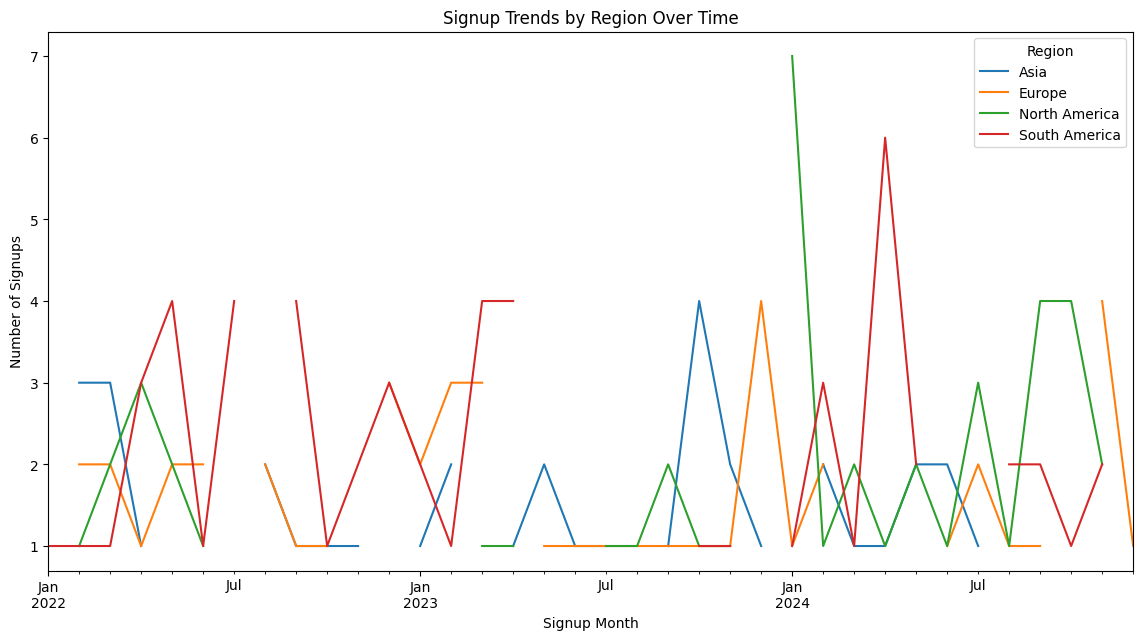

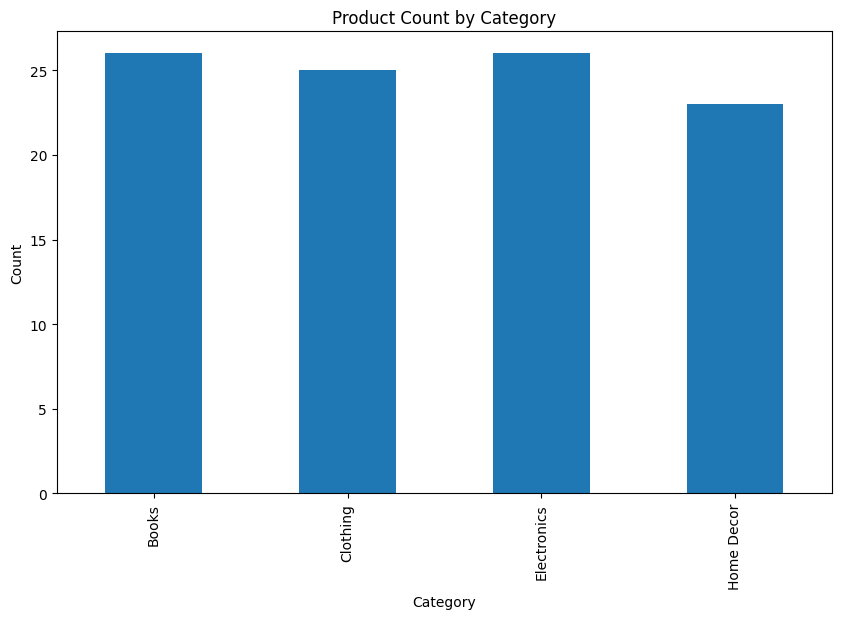

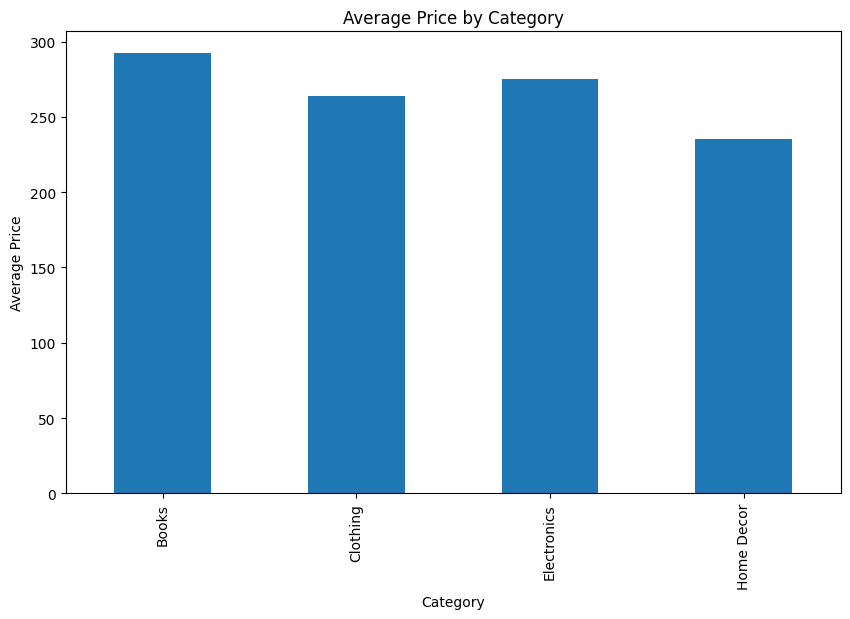

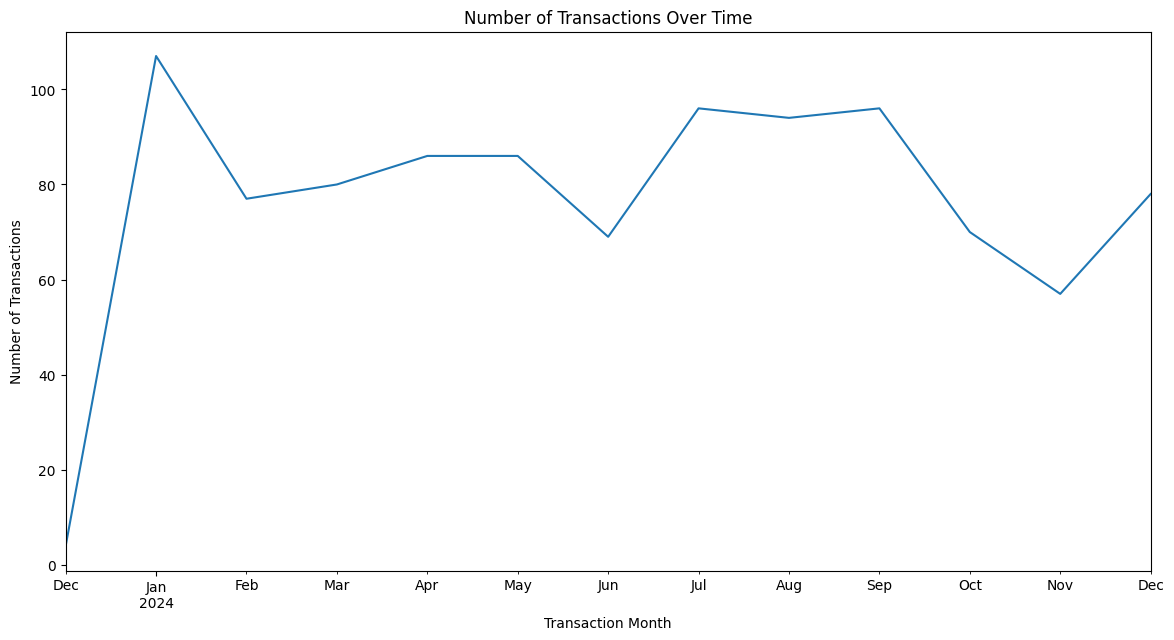

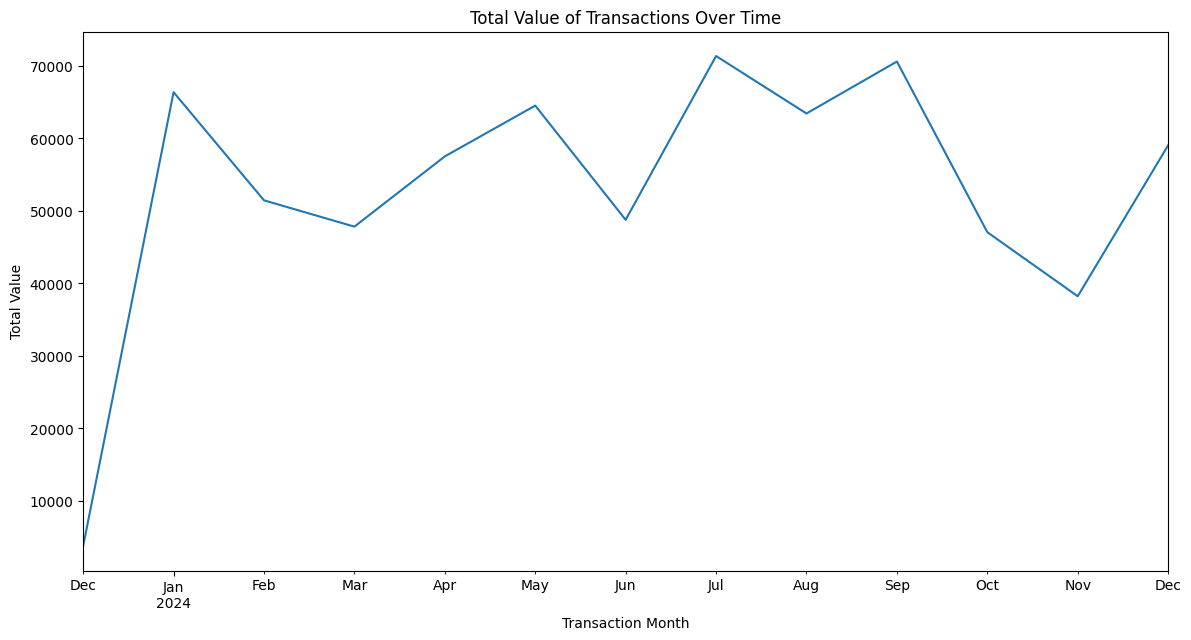

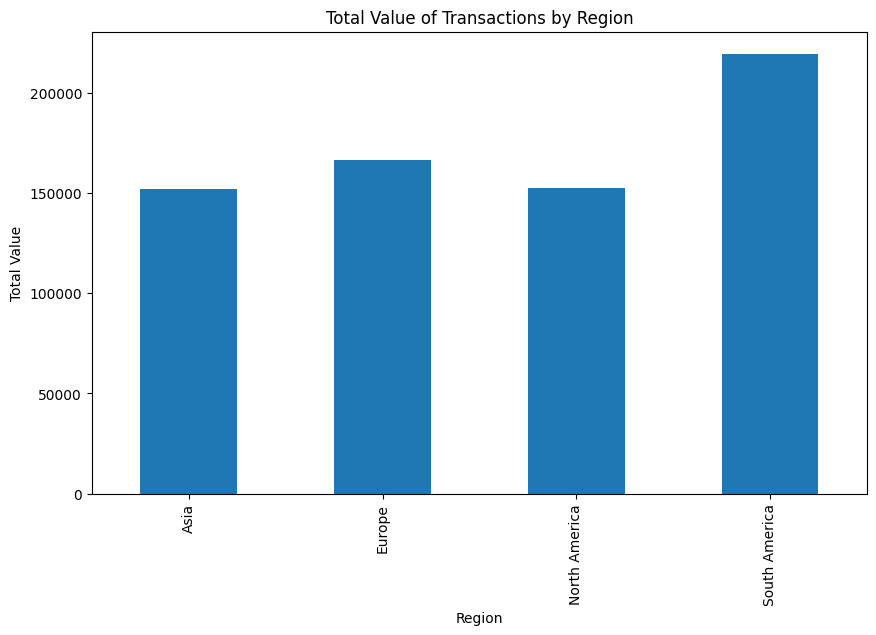

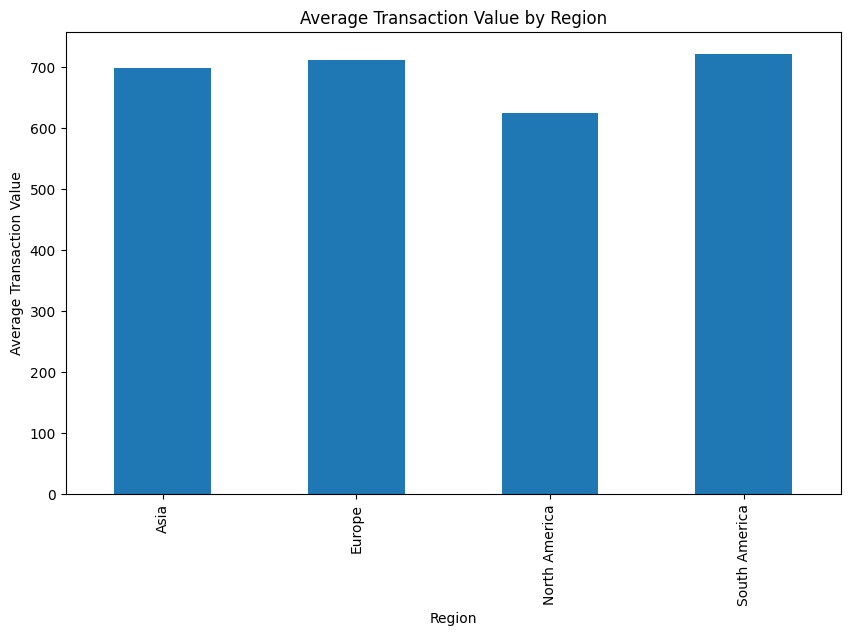

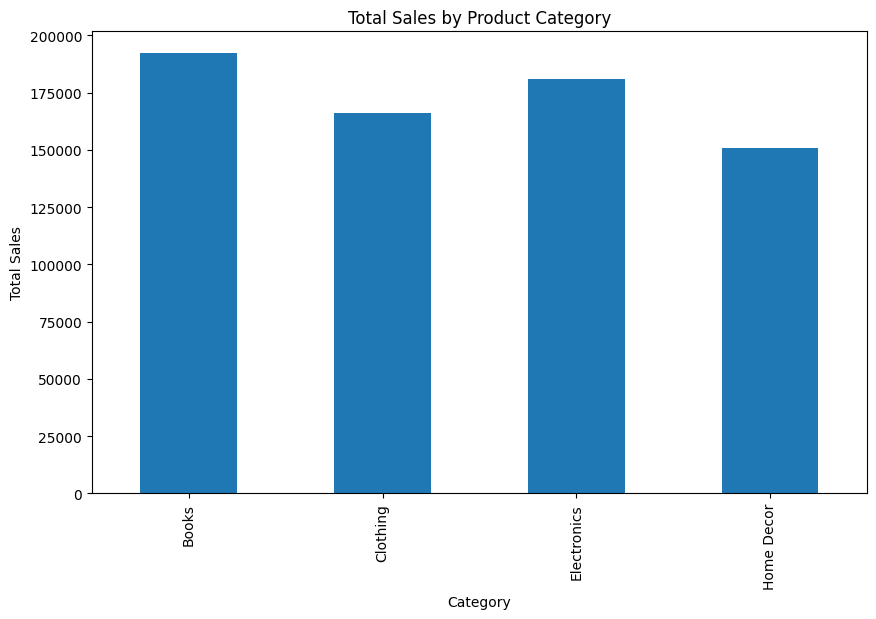

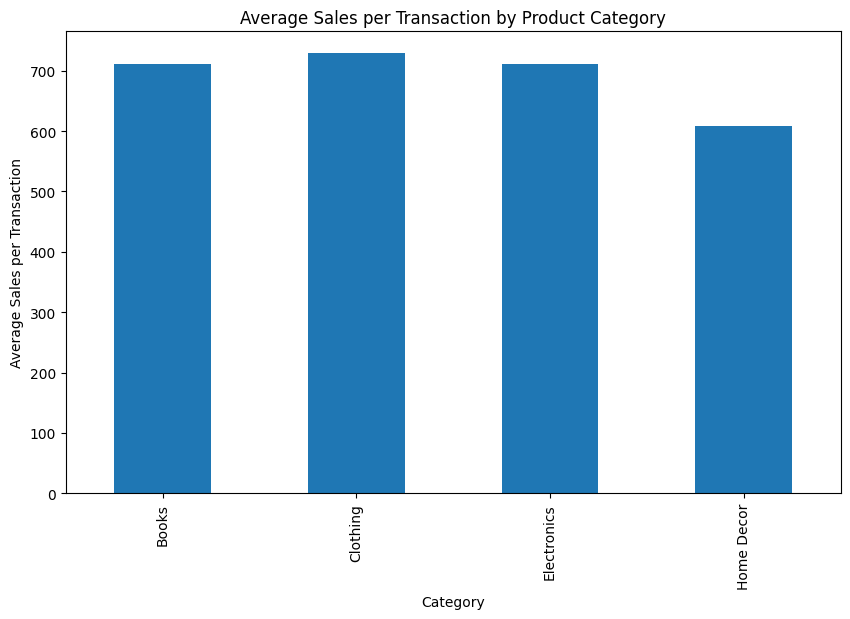

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load the datasets
customers_df = pd.read_csv('/workspaces/eCommerce-Transaction-Dataset/Customers.csv')
products_df = pd.read_csv('/workspaces/eCommerce-Transaction-Dataset/Products.csv')
transactions_df = pd.read_csv('/workspaces/eCommerce-Transaction-Dataset/Transactions.csv')

# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Basic EDA Functions
def analyze_customer_demographics():
    # Regional distribution
    region_dist = customers_df['Region'].value_counts()
    
    # Signup trends by region over time
    customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M')
    signup_trends = customers_df.groupby(['SignupMonth', 'Region']).size().unstack()
    
    return region_dist, signup_trends

def analyze_product_metrics():
    # Category distribution and pricing
    category_stats = products_df.groupby('Category').agg({
        'Price': ['count', 'mean', 'min', 'max']
    })
    
    return category_stats

def analyze_transactions():
    # Transactions over time
    transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
    transactions_over_time = transactions_df.groupby('TransactionMonth').size()
    
    # Total value of transactions by month
    total_value_by_month = transactions_df.groupby('TransactionMonth')['TotalValue'].sum()
    
    return transactions_over_time, total_value_by_month

def analyze_customer_behavior():
    # Merge datasets for analysis
    merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')
    
    # Total value of transactions by region
    total_value_by_region = merged_df.groupby('Region')['TotalValue'].sum()
    
    # Average transaction value by region
    avg_transaction_value_by_region = merged_df.groupby('Region')['TotalValue'].mean()
    
    return total_value_by_region, avg_transaction_value_by_region

def analyze_product_performance():
    # Merge datasets for analysis
    merged_df = transactions_df.merge(products_df, on='ProductID')
    
    # Total sales by product category
    total_sales_by_category = merged_df.groupby('Category')['TotalValue'].sum()
    
    # Average sales per transaction by product category
    avg_sales_per_transaction_by_category = merged_df.groupby('Category')['TotalValue'].mean()
    
    return total_sales_by_category, avg_sales_per_transaction_by_category

# Visualization Functions
def plot_customer_demographics(region_dist, signup_trends):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=region_dist.index, y=region_dist.values)
    plt.title('Customer Distribution by Region')
    plt.xlabel('Region')
    plt.ylabel('Number of Customers')
    plt.show()
    
    signup_trends.plot(kind='line', figsize=(14, 7))
    plt.title('Signup Trends by Region Over Time')
    plt.xlabel('Signup Month')
    plt.ylabel('Number of Signups')
    plt.show()

def plot_product_metrics(category_stats):
    category_stats['Price']['count'].plot(kind='bar', figsize=(10, 6))
    plt.title('Product Count by Category')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()
    
    category_stats['Price']['mean'].plot(kind='bar', figsize=(10, 6))
    plt.title('Average Price by Category')
    plt.xlabel('Category')
    plt.ylabel('Average Price')
    plt.show()

def plot_transactions(transactions_over_time, total_value_by_month):
    transactions_over_time.plot(kind='line', figsize=(14, 7))
    plt.title('Number of Transactions Over Time')
    plt.xlabel('Transaction Month')
    plt.ylabel('Number of Transactions')
    plt.show()
    
    total_value_by_month.plot(kind='line', figsize=(14, 7))
    plt.title('Total Value of Transactions Over Time')
    plt.xlabel('Transaction Month')
    plt.ylabel('Total Value')
    plt.show()

def plot_customer_behavior(total_value_by_region, avg_transaction_value_by_region):
    total_value_by_region.plot(kind='bar', figsize=(10, 6))
    plt.title('Total Value of Transactions by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Value')
    plt.show()
    
    avg_transaction_value_by_region.plot(kind='bar', figsize=(10, 6))
    plt.title('Average Transaction Value by Region')
    plt.xlabel('Region')
    plt.ylabel('Average Transaction Value')
    plt.show()

def plot_product_performance(total_sales_by_category, avg_sales_per_transaction_by_category):
    total_sales_by_category.plot(kind='bar', figsize=(10, 6))
    plt.title('Total Sales by Product Category')
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.show()
    
    avg_sales_per_transaction_by_category.plot(kind='bar', figsize=(10, 6))
    plt.title('Average Sales per Transaction by Product Category')
    plt.xlabel('Category')
    plt.ylabel('Average Sales per Transaction')
    plt.show()

# Run analysis and plot results
region_dist, signup_trends = analyze_customer_demographics()
plot_customer_demographics(region_dist, signup_trends)

category_stats = analyze_product_metrics()
plot_product_metrics(category_stats)

transactions_over_time, total_value_by_month = analyze_transactions()
plot_transactions(transactions_over_time, total_value_by_month)

total_value_by_region, avg_transaction_value_by_region = analyze_customer_behavior()
plot_customer_behavior(total_value_by_region, avg_transaction_value_by_region)

total_sales_by_category, avg_sales_per_transaction_by_category = analyze_product_performance()
plot_product_performance(total_sales_by_category, avg_sales_per_transaction_by_category)